In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

column_names = ['ID','RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Target']
data = pd.read_csv('D:\VScodeProjects\GlassType\Data\glass.data', names=column_names, sep=',')
data.drop(['ID'], axis = 1, inplace = True)
column_names.pop(0)
print(data)

#All features are Continous and Ratio, target is obviously categorical

          RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Target
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0       1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0       1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0       1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0       1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0       1
..       ...    ...   ...   ...    ...   ...   ...   ...  ...     ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0       7
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0       7
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0       7
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0       7
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0       7

[214 rows x 10 columns]


In [57]:
# Calculate statistics for each column
statistics = {
    'Column': [],
    'Mean': [],
    'Median': [],
    'Min': [],
    'Max': [],
    'Standard Deviation': []
}

for col_name in column_names:
    column_data = data[col_name]
    mean = np.mean(column_data)
    median = np.median(column_data)
    minimum = np.min(column_data)
    maximum = np.max(column_data)
    std_dev = np.std(column_data)

    statistics['Column'].append(col_name)
    statistics['Mean'].append(mean)
    statistics['Median'].append(median)
    statistics['Min'].append(minimum)
    statistics['Max'].append(maximum)
    statistics['Standard Deviation'].append(std_dev)

# Create a DataFrame to display the statistics
statistics_df = pd.DataFrame(statistics)

print(statistics_df)

   Column       Mean    Median       Min       Max  Standard Deviation
0      RI   1.518365   1.51768   1.51115   1.53393            0.003030
1      Na  13.407850  13.30000  10.73000  17.38000            0.814693
2      Mg   2.684533   3.48000   0.00000   4.49000            1.439034
3      Al   1.444907   1.36000   0.29000   3.50000            0.498102
4      Si  72.650935  72.79000  69.81000  75.41000            0.772734
5       K   0.497056   0.55500   0.00000   6.21000            0.650666
6      Ca   8.956963   8.60000   5.43000  16.19000            1.419824
7      Ba   0.175047   0.00000   0.00000   3.15000            0.496056
8      Fe   0.057009   0.00000   0.00000   0.51000            0.097211
9  Target   2.780374   2.00000   1.00000   7.00000            2.098818


<Axes: xlabel='Target'>

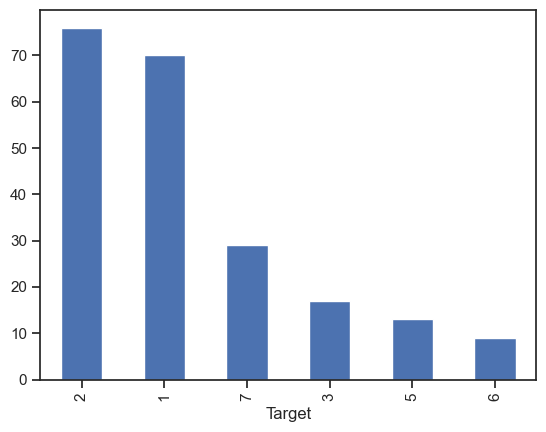

In [58]:
# class imbalance
x = data["Target"].value_counts()
x.plot.bar()

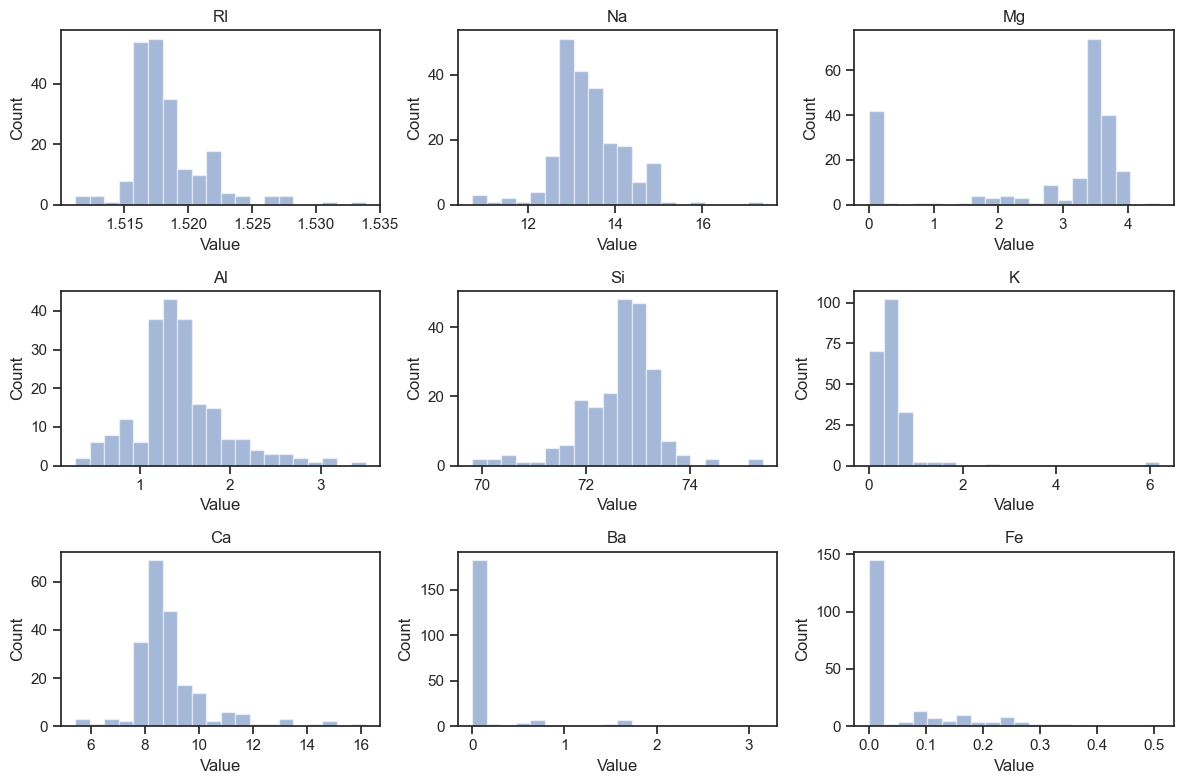

In [59]:
# Create a separate histogram for each attribute
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed

modified_col_names_list = column_names
modified_col_names_list.pop(-1)

for i, col_name in enumerate(column_names):
    plt.subplot(3, 3, i + 1)  # Create a 3x4 grid of subplots
    plt.hist(data[col_name], bins=20, alpha=0.5)
    plt.title(col_name)
    plt.xlabel('Value')
    plt.ylabel('Count')

# Adjust spacing between subplots
plt.tight_layout()

# Show the histograms
plt.show()

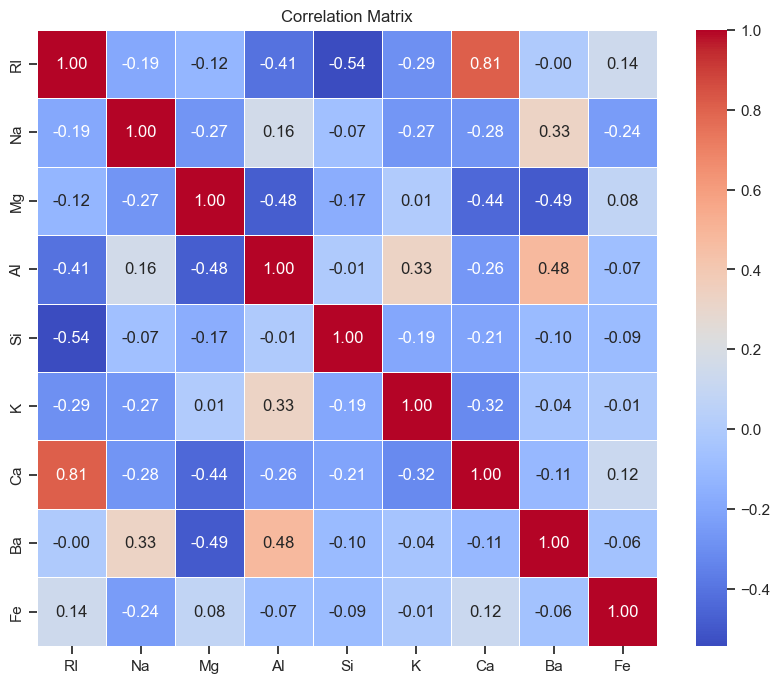

In [60]:
 # Drop the "Target" column
data_without_target = data.drop(columns=['Target'])

# Calculate the correlation matrix
correlation_matrix = data_without_target.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

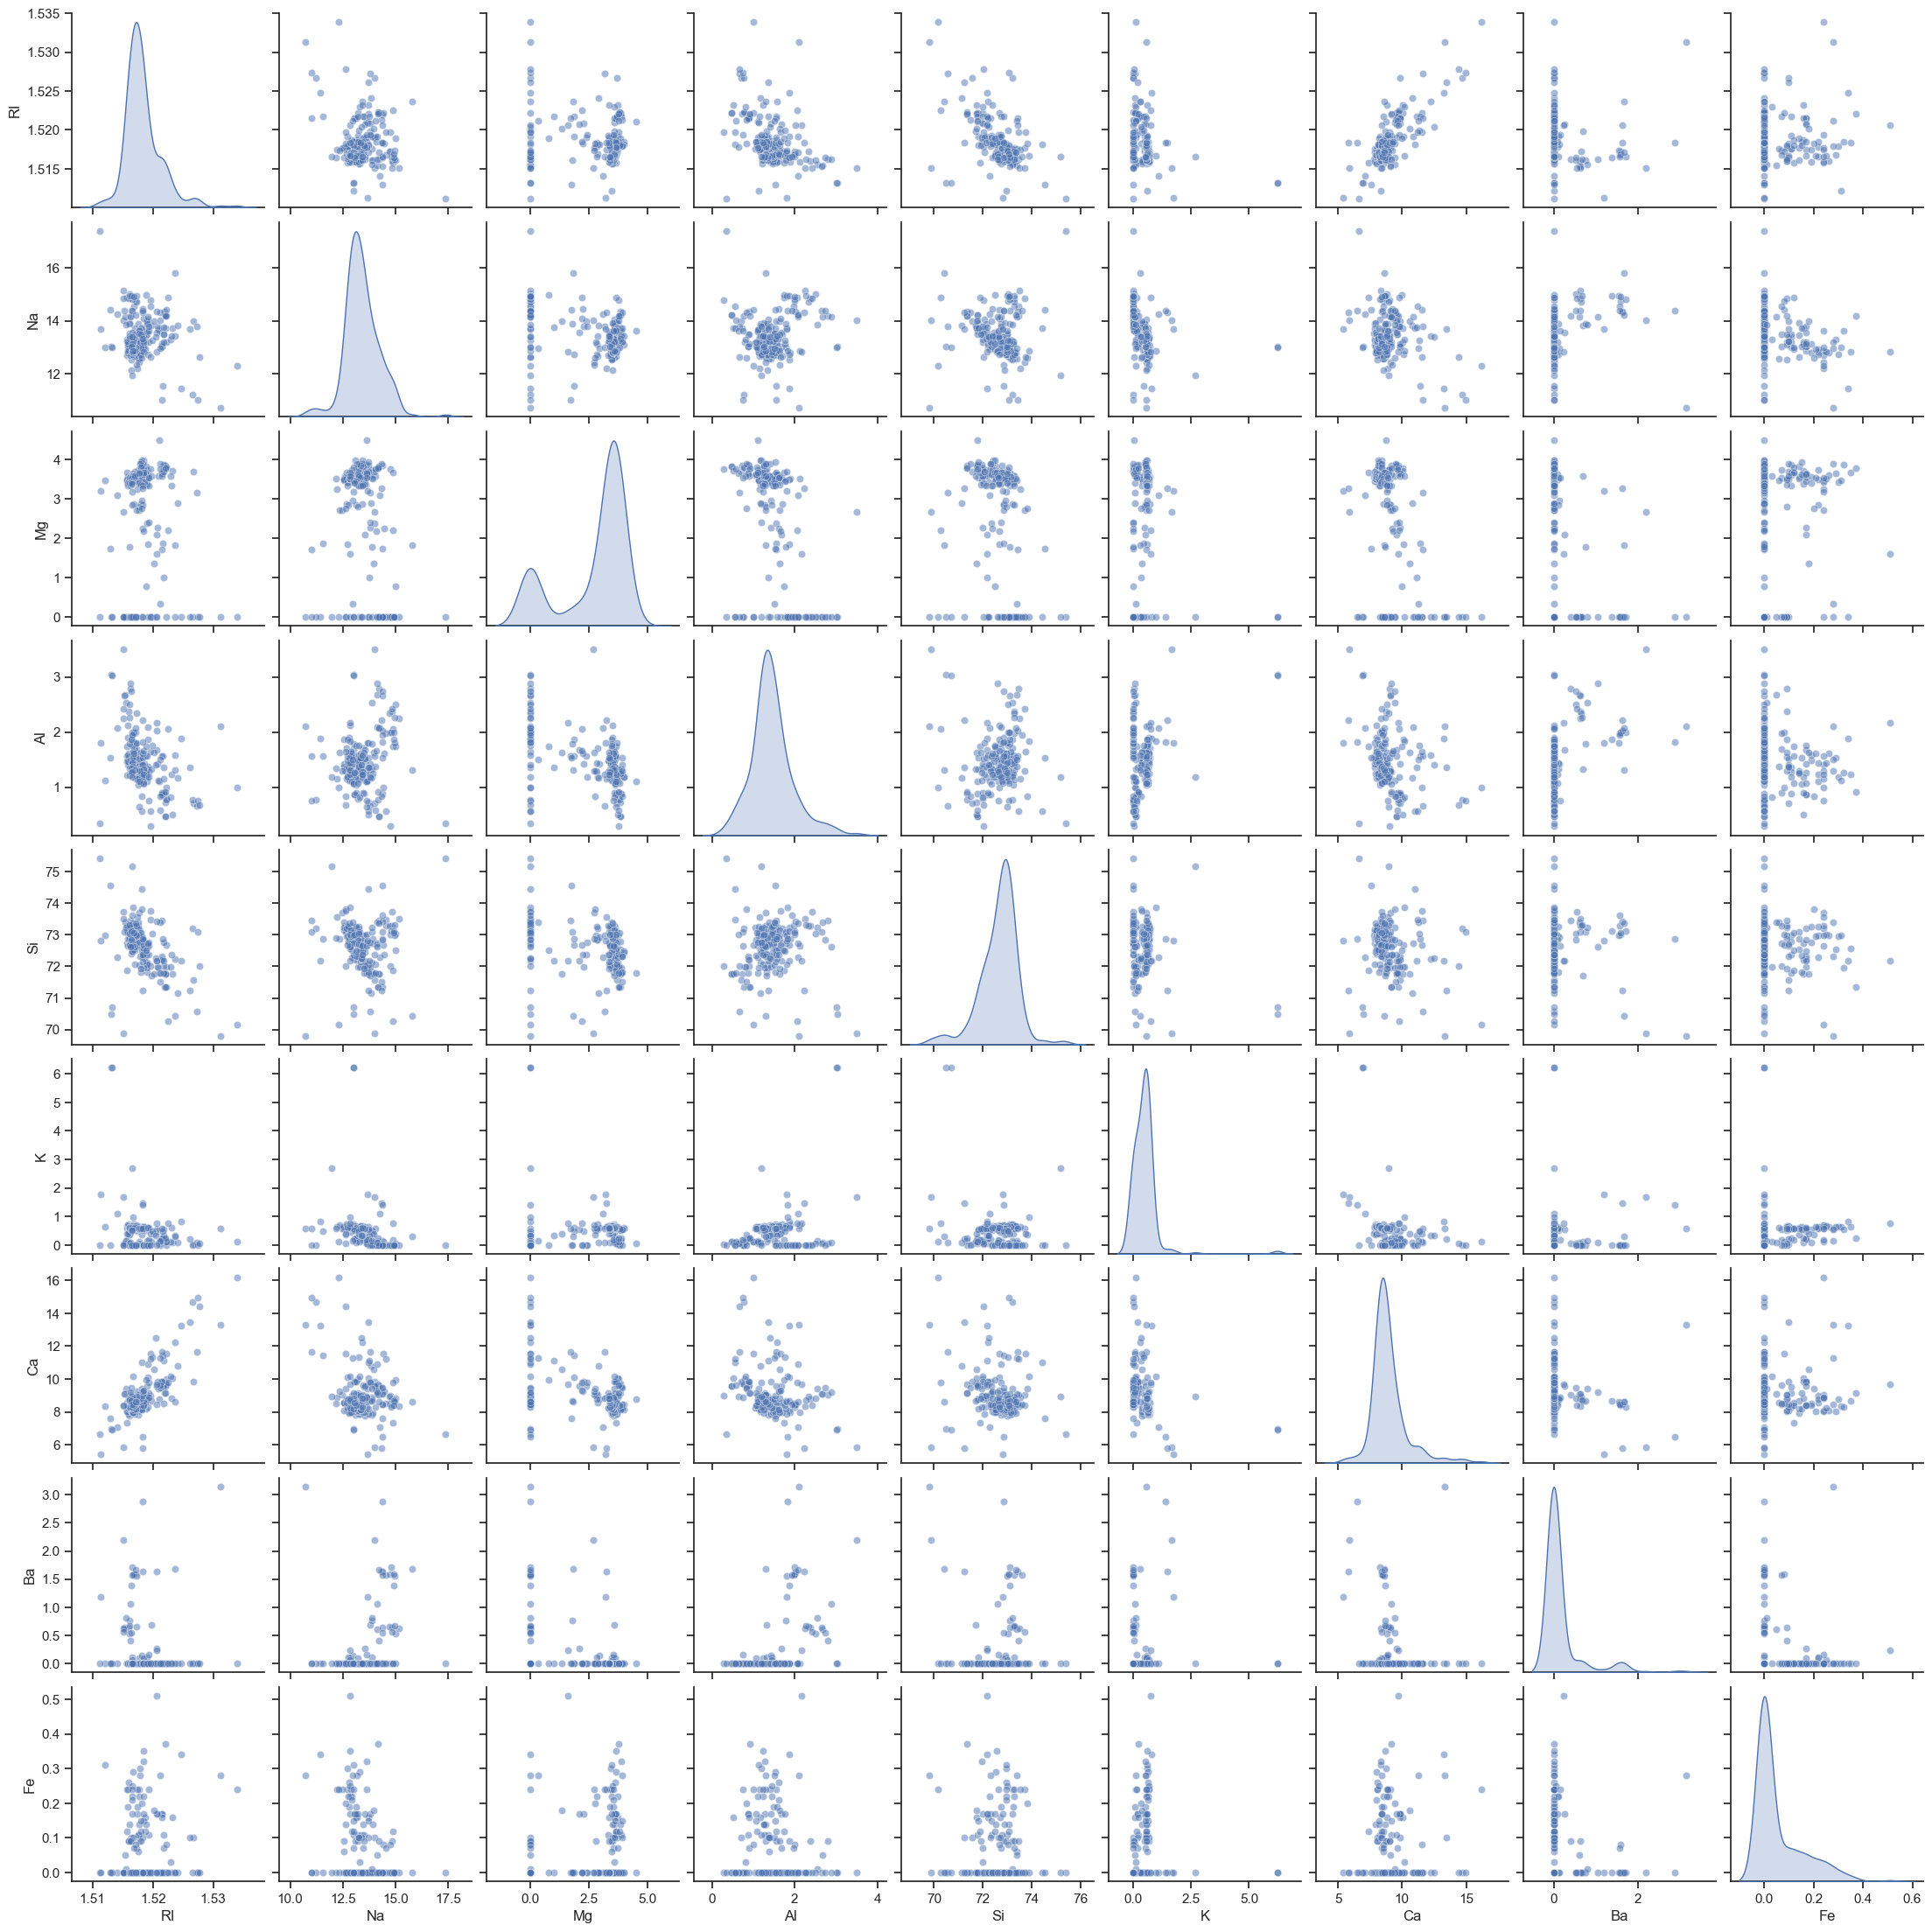

In [61]:
# Create a pair plot for the attribute correlations
sns.set(style="ticks")
sns.pairplot(data_without_target, diag_kind="kde", markers="o", plot_kws={'alpha':0.5})

# Show the pair plot
plt.show()

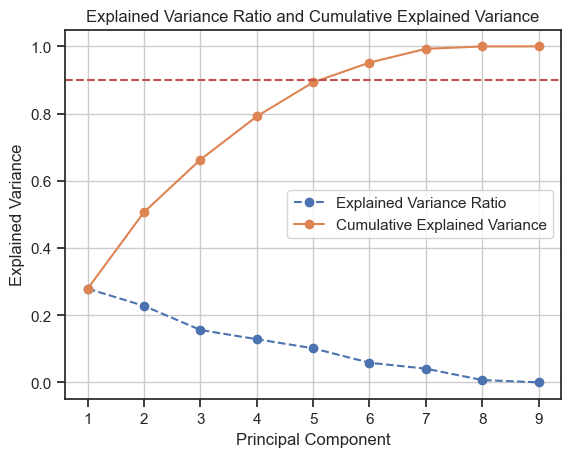

In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardize the data (mean=0, std=1)
scaler = StandardScaler()
data_std = scaler.fit_transform(data_without_target)

# Perform PCA
pca = PCA()
pca_result = pca.fit_transform(data_std)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate cumulative explained variance
cumulative_variance = explained_variance_ratio.cumsum()

# Explained variance ratio
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--', label='Explained Variance Ratio')

# Cumulative explained variance
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-', label='Cumulative Explained Variance')

plt.title('Explained Variance Ratio and Cumulative Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.legend()
plt.grid(True)

# 0.9 Explained Variance line
plt.axhline(y=0.9, color='r', linestyle='--', label='0.9 Explained Variance')

# Show the plot
plt.show()

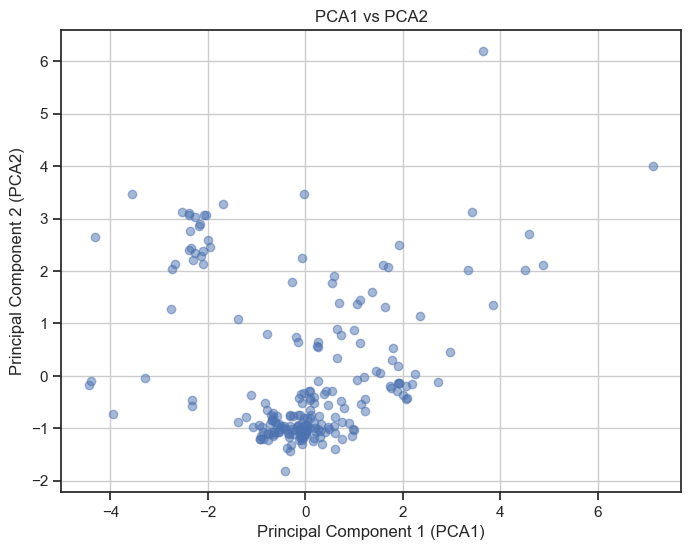

In [71]:
# Create a scatter plot of PCA1 vs PCA2
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], marker='o', alpha=0.5)
plt.title('PCA1 vs PCA2')
plt.xlabel('Principal Component 1 (PCA1)')
plt.ylabel('Principal Component 2 (PCA2)')
plt.grid(True)

# Show the scatter plot
plt.show()

In [70]:
# Get the PCA values (directions) for each attribute
pca_values = pd.DataFrame(pca.components_.T, columns=['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9'])
print(pca_values)

       PCA1      PCA2      PCA3      PCA4      PCA5      PCA6      PCA7  \
0  0.545177  0.285683  0.086911  0.147381 -0.073543  0.115288  0.081867   
1 -0.258126  0.270350 -0.384920  0.491242  0.153683 -0.558118  0.148580   
2  0.110881 -0.593558  0.008418  0.378786  0.123509  0.308186 -0.206045   
3 -0.428709  0.295212  0.329237 -0.137506  0.014109 -0.018857 -0.699236   
4 -0.228836 -0.155099 -0.458709 -0.652538  0.008500  0.086098  0.216067   
5 -0.219344 -0.153970  0.662574 -0.038535 -0.307040 -0.243632  0.504121   
6  0.492306  0.345380 -0.000985 -0.276443 -0.188188 -0.148669 -0.099135   
7 -0.250375  0.484702  0.074055  0.133175  0.251334  0.657219  0.351783   
8  0.185842 -0.062039  0.284451 -0.230492  0.873264 -0.243044  0.073721   

       PCA8      PCA9  
0 -0.752216  0.025732  
1 -0.127693 -0.311937  
2 -0.076891 -0.577273  
3 -0.274441 -0.192227  
4 -0.379923 -0.298073  
5 -0.109812 -0.260509  
6  0.398705 -0.579323  
7  0.144932 -0.198228  
8 -0.016271 -0.014669  


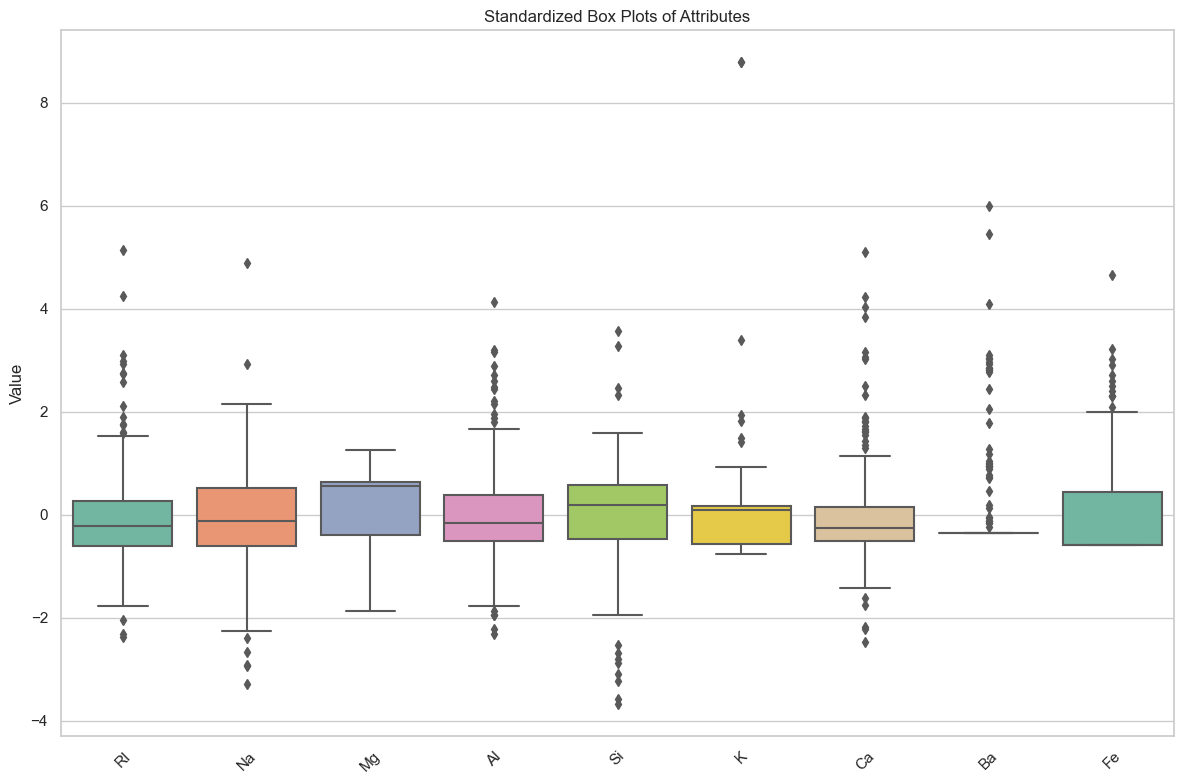

In [73]:
# Create box plots for each attribute
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
sns.boxplot(data=pd.DataFrame(data_std, columns=data_without_target.columns), orient="v", palette="Set2")
plt.title('Standardized Box Plots of Attributes')
plt.ylabel('Value')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

# Show the box plots
plt.tight_layout()
plt.show()